<a href="https://colab.research.google.com/github/QuocTrinh-coder/Gaming_Impact_Analysis_Project/blob/main/Game_Impacts_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

**DON'T FORGET TO IMPORT DATASET FIRST BEFORE RUNNING CODE**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

**School Shooting dataset and cleaning processing**

In [ ]:
# the data set is a mashup of the Pah/Amaral/Hagan research on school shootings with the Wikipedia article from 1990 to present.
# Date: date of incident
# City: location of incident
# State: location of incident
# Area Type: urban or suburban (only in Pah dataset)
# School: C = college, HS = high school, MS = middle school, ES = elementary school, - = unknown
# Fatalities: # killed
# Wounded: # wounded (only in Wikipedia dataset)
# Dupe: whether this incident appears in both datasets. Note: only the "school_shootings.csv" version of the incident is marked.
# Source: Pah or Wikp
# Desc: text description of incident (only in Wikipedia dataset)
shooting_cases = pd.read_csv("school_shootings.csv")
# drop the last 2 columns bc it's extra, drop dupe and source columns bc info doesn't needed rn
shooting_cases = shooting_cases.drop(columns = ["Unnamed: 10", "Unnamed: 11", "Dupe", "Desc", "AreaType", "Source", "School","City"])

# impute na in areatype with missing category
# shooting_cases["AreaType"] = shooting_cases["AreaType"].fillna("missing")

# use the mode of wounded to fill in nan, mode() return an iterable object counting from 0th index
# idk if this this the best method for imputation. Maybe do CV for imputation by median, mean and estimate base on fatalities
# then see which one is the best
shooting_cases["Wounded"] = shooting_cases["Wounded"].fillna(shooting_cases["Wounded"].mode()[0])

# change nan values for desc and school to missing and no description
# shooting_cases["Desc"] = shooting_cases["Desc"].fillna("No description")
# shooting_cases["School"] = shooting_cases["School"].fillna("missing") # only 2 observations that have missing school

# shooting case df after cleaning
shooting_cases["Date"] = pd.to_datetime(shooting_cases["Date"], format = "%m/%d/%Y")
shooting_cases["Date"] = shooting_cases["Date"].dt.year
shooting_cases

,Date,State,Fatalities,Wounded
0,1990,New York,0,1.0
1,1990,Tennessee,1,1.0
2,1990,Nevada,1,1.0
3,1990,Texas,0,3.0
4,1991,Texas,0,1.0
...,...,...,...,...
781,2023,Texas,0,1.0
782,2023,Colorado,1,2.0
783,2023,South Carolina,0,0.0
784,2023,Tennessee,7,1.0


In [ ]:
NY = "New York"
Ten = "Tennessee"
NV = "Nevada"
TX = "Texas"
CA = "California"
IO = "Iowa"
OH = "Ohio"
NE = "Nebraska"
AR = "Arizona"
MI ='Michigan'
IL ='Illinois'
AL ='Alabama'
MA= 'Massachusetts'
PE ='Pennsylvania'
FL ='Florida'
KE='Kentucky'
WA = 'Washington'
GE =   'Georgia'
MI = 'Minnesota'
COL =  'District of Columbia'
MI =     'Missouri'
NC  =   'North Carolina'
LO =      'Louisiana'
UT =      'Utah'
WY =    'Wyoming'
DE ='Delaware'
CON=    'Connecticut'
MI =  'Mississippi'
WIS =  'Wisconsin'
SC =    'South Carolina'
MON =     'Montana'
KAN =   'Kansas'
DC =    'D.C.'
ARK ='Arkansas'
IN =   'Indiana'
OK =   'Oklahoma'
ALASKA =  'Alaska'
OR =   'Oregon'
VIR =  'Virginia'
ID =   'Idaho'
COLO =     'Colorado'
NM  =    'New Mexico'
ML  =  'Maryland'
NJ  =   'New Jersey'
VI ='Virgin Islands'
VM = 'Vermont'
WV =    'West Virginia'
MAINE =   'Maine'
HAWAII = 'Hawaii'
NH =  'New Hampshire'
SODAK = 'South Dakota'
IA =  'IA'
RI = 'Rhode Island'
states = [ NY,Ten ,NV ,TX ,CA ,IO ,OH ,NE ,AR ,MI ,IL ,AL ,MA,PE ,FL ,KE,WA ,GE ,
        MI ,COL ,MI ,NC  , LO ,UT ,WY ,DE ,CON,MI ,WIS ,SC ,MON ,KAN ,DC,IN ,OK ,
        ALASKA, OR ,VIR ,ID ,COLO, NM   ,  ML    ,NJ    ,VI ,VM ,WV ,MAINE, HAWAII, NH ,SODAK,IA ,RI ]

In [ ]:
for i in states:
    shooting_cases[i] = np.where(shooting_cases["State"] == i, 1 , 0)

In [ ]:
shooting_cases = shooting_cases.groupby("Date").sum()
states_names = shooting_cases.columns[3:]
shooting_cases["Total_shooting_case"] = shooting_cases[states_names].sum(axis=1)
shooting_cases.reset_index(inplace = True)
shooting_cases

<ipython-input-96-cc759a401933>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Date,Fatalities,Wounded,New York,Tennessee,Nevada,Texas,California,Iowa,Ohio,...,Virgin Islands,Vermont,West Virginia,Maine,Hawaii,New Hampshire,South Dakota,IA,Rhode Island,Total_shooting_case
0,1990,2,6.0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1991,20,8.0,3,0,0,5,2,2,1,...,0,0,0,0,0,0,0,0,0,10
2,1992,20,42.0,4,0,0,2,3,0,1,...,0,0,0,0,0,0,0,0,0,14
3,1993,44,40.0,2,0,0,4,5,0,0,...,0,0,0,0,0,0,0,0,0,37
4,1994,30,30.0,1,2,0,1,5,1,2,...,0,0,0,0,0,0,0,0,0,28
5,1995,19,17.0,1,3,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,16
6,1996,32,22.0,0,1,0,1,6,0,0,...,0,0,0,0,0,0,0,0,0,20
7,1997,28,29.0,1,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,14
8,1998,35,57.0,1,2,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,16
9,1999,39,46.0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,18


**School population over the years base on Cencus\** Do need to double check the appropriate imputation method

In [ ]:
# US census data on school populations. Fields should be fairly self explanatory.
school_pop = pd.read_csv("school_pop.csv")
school_pop = school_pop.fillna(0) # impute by fill in 0 for NA
school_pop

,Year,Total enrolled,N-Total,N-Public,N-Private,K-Total,K-Public,K-Private,E-Total,E-Public,E-Private,H-Total,H-Public,H-Private,C-Total,C-Public,C-Private,C-Full time
0,2022,72346,3405.0,1888.0,1517.0,3696,3009,687,32005,28300,3705,15957,14747.0,1211.0,17282,13729.0,3553.0,13718.0
1,2021,73456,3801.0,2134.0,1667.0,3765,3145,619,32148,28708,3439,16195,14992.0,1203.0,17547,14084.0,3463.0,13656.0
2,2020,73222,3545.0,2094.0,1451.0,3698,3112,586,32046,28596,3449,16259,14964.0,1296.0,17674,13917.0,3757.0,13774.0
3,2019,76089,4728.0,2614.0,2114.0,4057,3531,525,32619,29754,2866,16395,15208.0,1187.0,18289,14746.0,3543.0,13849.0
4,2018,76840,4836.0,2763.0,2073.0,3908,3529,379,32483,29665,2818,16706,15519.0,1187.0,18908,15234.0,3674.0,14204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1959,44370,0.0,0.0,0.0,2032,1678,354,29382,24680,4702,9616,8571.0,1045.0,3340,2120.0,1220.0,2464.0
64,1958,42900,0.0,0.0,0.0,1991,1569,422,28184,23800,4385,9482,8485.0,998.0,3242,2088.0,1155.0,0.0
65,1957,41166,0.0,0.0,0.0,1824,1471,353,27248,23076,4172,8956,8059.0,897.0,3138,2054.0,1084.0,0.0
66,1956,39353,0.0,0.0,0.0,1758,1566,192,26169,22474,3695,8543,7668.0,875.0,2883,1824.0,1059.0,0.0


**Most popular video games over the years Dataset and Imputation Process**

In [ ]:
# backlogs is when user buy the games without playing it once

games = pd.read_csv("games.csv")
games = games.drop(columns = ["Unnamed: 0","Reviews","Team", "Summary"] ) # drop extra index column
#games["Team"] = games["Team"].fillna("Missing") # impute missing value for dev company with missing value
# impute missing rating value with the median bc there are outliers so impute with mean isn't appriate.
# could check for better imputation method later
# drop the row with Na value for summary column ( bc the game hasn't release yet which is not valuable to analyze for the project )
# games = games.dropna(subset = ["Summary"]).reset_index(drop = True)
# games.isna().sum() # check for Nan values

games["Rating"] = games["Rating"].fillna(games["Rating"].dropna().mean())
games = games.drop([644,1251])

# get only the years of the game release date
games["Release Date"] = games["Release Date"].str[7:] # only run this once before changing the original dataset
# rename specific column if neccesary
#games.rename(columns={'Release Date': 'Date'}, inplace=True)

games = games.drop([649,1252], axis = 0) # un released games
games["Release Date"] = games["Release Date"].astype(int)
games["Release Date"] = pd.to_datetime(games["Release Date"], format = "%Y").dt.year
games = games.sort_values(by='Release Date', ascending=True)
games = games.reset_index(drop = True)
games = games.drop([1506,1507], axis = 0) # these are 2024 and 2025 games which we don't take in consideration

In [ ]:
# this part is to transfer the abbriviated number such as 3.9K to actual float value for 6 columns in game dataset

# empty list to store the float value
converted_plays = []
converted_playing = []
converted_backlogs = []
converted_wishlist = []
converted_listed = []
converted_reviews = []
#___________________________________________________
for value in games["Plays"]:
    if value.endswith("K"):
        number = float(value[:-1]) * 1000 #slice the str value till the last letter before "K", turn it to float, then multply by 1000
    else:
        number = float(value)
    converted_plays.append(number)
#___________________________________________________
for value in games["Playing"]:
    if value.endswith("K"):
        number = float(value[:-1]) * 1000
    else:
        number = float(value)
    converted_playing.append(number)
#______________________________________________________
for value in games["Backlogs"]:
    if value.endswith("K"):
        number = float(value[:-1]) * 1000
    else:
        number = float(value)
    converted_backlogs.append(number)
#_________________________________________________________
for value in games["Wishlist"]:
    if value.endswith("K"):
        number = float(value[:-1]) * 1000
    else:
        number = float(value)
    converted_wishlist.append(number)
#________________________________________________________
for value in games["Times Listed"]:
    if value.endswith("K"):
        number = float(value[:-1]) * 1000
    else:
        number = float(value)
    converted_listed.append(number)
#________________________________________________________
for value in games["Number of Reviews"]:
    if value.endswith("K"):
        number = float(value[:-1]) * 1000
    else:
        number = float(value)
    converted_reviews.append(number)

games["Plays"] = converted_plays
games["Playing"] = converted_playing
games["Backlogs"] = converted_backlogs
games["Wishlist"] = converted_wishlist
games["Times Listed"] = converted_listed
games["Number of Reviews"] = converted_reviews

In [ ]:
games.head()

,Title,Release Date,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,Pac-Man,1980,3.4,427.0,427.0,['Arcade'],5200.0,7.0,108.0,31.0
1,Ms. Pac-Man,1982,3.6,198.0,198.0,['Arcade'],1600.0,1.0,45.0,38.0
2,Super Mario Bros.,1985,3.5,1500.0,1500.0,"['Adventure', 'Platform']",18000.0,59.0,733.0,237.0
3,Bubble Bobble,1986,3.3,187.0,187.0,"['Arcade', 'Platform', 'Puzzle', 'Strategy']",1400.0,3.0,110.0,57.0
4,The Legend of Zelda,1986,3.2,1200.0,1200.0,['Adventure'],9300.0,132.0,1500.0,463.0


In [ ]:
# sub dataset for shooting games only, anything in genre column with shooter or brawler
# apply the function on the genre column, any function return bool to see if any value it checks is Brawler","Shooter".
# The lambda function checks if any of the elements in the list ("lst") contain any of the specified genres: "Brawler" or "Shooter".
# if it matches, then take that row out, if not then don't take it

all_games = games.groupby("Release Date").sum().reset_index(inplace = False)

violence_games = games[games["Genres"].apply(lambda lst: any(x in lst for x in ["Brawler","Shooter"]))]
violence_games = violence_games.reset_index(drop=True)
violence_games["Release Date"] = pd.to_datetime(violence_games["Release Date"], format = "%Y").dt.year
violence_games = violence_games.groupby("Release Date").sum().reset_index(inplace = False)
violence_games

# sub dataset for non violence game, anything else beside shooter and brawler
# same thing but i used ~ symbol to indicate the opposte thing to not ( basically "not")
non_vio_games = games[~games["Genres"].apply(lambda lst: any(x in lst for x in ["Brawler","Shooter"]))]
non_vio_games = non_vio_games.reset_index(drop = True)
non_vio_games["Release Date"] = pd.to_datetime(non_vio_games["Release Date"], format = "%Y").dt.year
non_vio_games = non_vio_games.groupby("Release Date").sum().reset_index(inplace = False)
all_games

<ipython-input-101-d3b5936fe7b7>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-101-d3b5936fe7b7>:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-101-d3b5936fe7b7>:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
0,1980,3.400000,427.0,427.0,5200.0,7.0,108.0,31.0
1,1982,3.600000,198.0,198.0,1600.0,1.0,45.0,38.0
2,1985,3.500000,1500.0,1500.0,18000.0,59.0,733.0,237.0
3,1986,13.100000,3432.0,3432.0,25700.0,325.0,3979.0,1348.0
4,1987,8.300000,1739.0,1739.0,11800.0,110.0,2091.0,655.0
5,1988,17.600000,5875.0,5875.0,51900.0,369.0,5121.0,1330.0
6,1989,19.400000,3287.0,3287.0,33900.0,194.0,1510.0,479.0
7,1990,22.000000,3901.0,3901.0,29200.0,326.0,3723.0,1304.0
8,1991,38.100000,9106.0,9106.0,77239.0,1068.0,11806.0,3770.0
9,1992,20.800000,3255.0,3255.0,20847.0,333.0,4142.0,1800.0


In [ ]:
violence_games.head()

,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
0,1987,2.9,344.0,344.0,1900.0,29.0,539.0,213.0
1,1988,2.5,211.0,211.0,1500.0,2.0,154.0,55.0
2,1991,6.4,584.0,584.0,3600.0,44.0,677.0,269.0
3,1992,4.0,242.0,242.0,547.0,25.0,607.0,434.0
4,1993,20.2,6600.0,6600.0,46800.0,761.0,6700.0,2312.0


**California SAT score 2015-2016** Need to check the imputation method and NA values. Consider to drop dataset if too many NA

In [ ]:
# SAT Report 2015-2016 (California)
# cds: County/District/School code (String)
# rtype: Record type (C=county, D=district, S=school, X = state ( California )) (String)
# sname: School name (String)
# dname: District name (String)
# cname: County name (String)
# enroll12: Enrollment of grade 12 (Integer)
# NumTstTakr: Number of test takers (Integer)
# AvgScrRead: Average of SAT score for critical reading (Integer)
# AvgScrMath: Average of SAT score for mathematics (Integer)
# AvgScrWrit: Average of SAT score for writing (Integer)
# NumGE1500: Number of test takers whose total SAT scores are greater or equal to 1500 (Integer)
# PctGE1500: Percentage of test takers whose total SAT scores are greater or equal to 1500 (Integer)
# year: Year of the SAT test results (Integer)
Sat = pd.read_csv("SAT_scores.csv")
# drop the district code, extra index column and the year columns bc it wasn't correct year
Sat = Sat.drop(columns = ["rtype","sname","dname","cds","index", "year", "cname", "enroll12","NumGE1500"])
# impute the missing values
# Sat["sname"] = Sat["sname"].fillna("record not a school type")
# Sat["dname"] = Sat["dname"].fillna("record not a district type")
#Sat["cname"] = Sat["cname"].fillna("record not a county type")
# school with missing sat score for all 4 section are useless so I deleted it
Sat = Sat.dropna(subset = ["AvgScrRead"]).reset_index(drop = True)

In [ ]:
# Sat score for california dataframe
Sat.head() # uncomment to see

,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,PctGE1500
0,214262,484,494,477,41.93
1,8611,517,534,515,54.53
2,95,395,378,388,6.32
3,92,391,376,386,5.43
4,472,527,543,514,63.77


**NY schools SAT score 2014-2015** Need to double check on imputation process

In [ ]:
# This dataset consists of a row for every accredited high school in New York City with its department ID number,
# school name, borough, building code, street address, latitude/longitude coordinates, phone number, start and end times,
# student enrollment with race breakdown, and average scores on each SAT test section for the 2014-2015 school year.

NY_sat = pd.read_csv("NYSAT_scores.csv")
# drop unnecssary columns
NY_sat = NY_sat.drop(columns = ["School ID","Borough","Building Code", "Street Address","Zip Code","Latitude", "Longitude",
                               'Phone Number', 'Start Time', 'End Time','Percent White', 'Percent Black',
                               'Percent Hispanic', 'Percent Asian', "School Name", "City", "State",
                               ])
# drop rows with na for all score portions and the % of students that tests
# i think we drop here bc it's not appropriate to assume the average test score for the school that student didn't even test
# 375 / 435 data rows remain
NY_sat = NY_sat.dropna(subset = ["Average Score (SAT Math)"])
NY_sat.head()

,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,1735.0,657.0,601.0,601.0,91.0%
3,358.0,395.0,411.0,387.0,78.9%
4,383.0,418.0,428.0,415.0,65.1%
5,416.0,613.0,453.0,463.0,95.9%
6,255.0,410.0,406.0,381.0,59.7%


**US Crimes over the years from 90s to 2019**

In [ ]:
crimes_rate = pd.read_csv("total_crimes.csv")
crimes_rate = crimes_rate.drop(columns = ["rape_revised", "state_abbr", "caveats", ])
crimes_rate["state_name"] = crimes_rate["state_name"].fillna("Total US Population").reset_index(drop = True)
#crimes_rate = crimes_rate.groupby("year").sum()
# crimes_rate = crimes_rate.reset_index(inplace = False)
crimes_rate = crimes_rate[crimes_rate["state_name"] == "Total US Population"]
crimes_rate = crimes_rate.reset_index(drop = True)
crimes_rate["rape_legacy"] = crimes_rate["rape_legacy"].fillna(round(crimes_rate["rape_legacy"].dropna().mean()))
crimes_rate["Total_Crime"] = crimes_rate.iloc[:,3:].sum(axis = 1)
crimes_rate.head()

,year,state_name,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,Total_Crime
0,1979,Total US Population,220099000,1208030,21460,76390.0,480700,629480,11041500,3327700,6601000,1112800,24499060.0
1,1980,Total US Population,225349264,1344520,23040,82990.0,565840,672650,12063700,3795200,7136900,1131700,26816540.0
2,1981,Total US Population,229465714,1361820,22520,82500.0,592910,663900,12061900,3779700,7194400,1087800,26847450.0
3,1982,Total US Population,231664458,1322390,21010,78770.0,553130,669480,11652000,3447100,7142500,1062400,25948780.0
4,1983,Total US Population,233791994,1258087,19308,78918.0,506567,653294,10850543,3129851,6712759,1007933,24217260.0


**THE MERGED DATASET BETWEEN SHOOTING CASES AND GAMES**

**Does the creation of games impact the school shooting rate over the year ?**
- Maybe create a multi variable linear model with school shooting cases
- We can construct many multi variable linear models hypothesis tests with the predictors ( rating, time listed, numbers of reviews, playings, plays, wishlist )
- I think we can try to build model and use what we learn in 35C to reduce to the most relevant predictors then get the MSE. If the MSE is good, it means games can predict the criminal rate over the year which mean games does impact the criminal rate
correlation hypothesis test

### NOTE
Rating values have correlation with some specific states crimes online

Rating : California, Florida, Kentucky, Georgia, North Carolina, Louisiana

Same with Time listed: Massachusetts, Florida, Kentucky, Georgia

Number of review : Massachusetts, Florida, Kentucky, Georgia

plays : Massachusetts, Florida, Kentucky, Georgia

playing :  Florida, Georgia

backlog : Massachusetts , Florida, Kentucky, Georgia

Wishlist : Massachusetts , Florida , Kentucky, Georgia

Successfully create a multi variable linear model. Check MSE to see if the model is good or not

In [ ]:
# re run this if the code below doesn't work
# concat the shooting cases with violance games dataset by inner join

# violence
shootingcase_vio_games = pd.merge(shooting_cases, violence_games, left_on = "Date", right_on = "Release Date", how = "inner")
# non violence
shootingcase_nonvio_games = pd.merge(shooting_cases, non_vio_games, left_on = "Date", right_on = "Release Date", how = "inner")
# all games
shootingcase_all_games = pd.merge(shooting_cases, all_games, left_on = "Date", right_on = "Release Date", how = "inner")

# checking
# shootingcase_nonvio_games
# shootingcase_vio_games
shootingcase_all_games

,Date,Fatalities,Wounded,New York,Tennessee,Nevada,Texas,California,Iowa,Ohio,...,Rhode Island,Total_shooting_case,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
0,1990,2,6.0,1,1,1,1,0,0,0,...,0,3,1990,22.000000,3901.0,3901.0,29200.0,326.0,3723.0,1304.0
1,1991,20,8.0,3,0,0,5,2,2,1,...,0,10,1991,38.100000,9106.0,9106.0,77239.0,1068.0,11806.0,3770.0
2,1992,20,42.0,4,0,0,2,3,0,1,...,0,14,1992,20.800000,3255.0,3255.0,20847.0,333.0,4142.0,1800.0
3,1993,44,40.0,2,0,0,4,5,0,0,...,0,37,1993,44.800000,9561.0,9561.0,70247.0,997.0,10381.0,3638.0
4,1994,30,30.0,1,2,0,1,5,1,2,...,0,28,1994,44.800000,12308.0,12308.0,73999.0,1949.0,20104.0,7102.0
5,1995,19,17.0,1,3,0,1,2,0,0,...,0,16,1995,45.700000,9049.0,9049.0,49219.0,1552.0,17010.0,6683.0
6,1996,32,22.0,0,1,0,1,6,0,0,...,0,20,1996,54.900000,14367.0,14367.0,118416.0,2031.0,16738.0,6018.0
7,1997,28,29.0,1,0,0,1,2,0,0,...,0,14,1997,66.400000,16218.0,16218.0,82385.0,4309.0,28317.0,11291.0
8,1998,35,57.0,1,2,0,0,5,0,0,...,0,16,1998,65.700000,16857.0,16857.0,111897.0,2640.0,26440.0,11965.0
9,1999,39,46.0,0,0,0,2,1,0,0,...,0,18,1999,91.400000,12452.0,12452.0,91596.0,1451.0,18812.0,9489.0


## Normalizing Data

In [ ]:
# standardize rating column
def normalize_and_mutate_column(column_names_to_norm,dataset):
    standardized_values = (dataset[column_names_to_norm].values - dataset[column_names_to_norm].mean()) / dataset[column_names_to_norm].std()
    dataset[column_names_to_norm] = standardized_values

for i in shootingcase_nonvio_games.columns[3:]:
#     normalize_and_mutate_column(i, shootingcase_nonvio_games)
#     normalize_and_mutate_column(i, shootingcase_vio_games)
    normalize_and_mutate_column(i, shootingcase_all_games)

## Graph

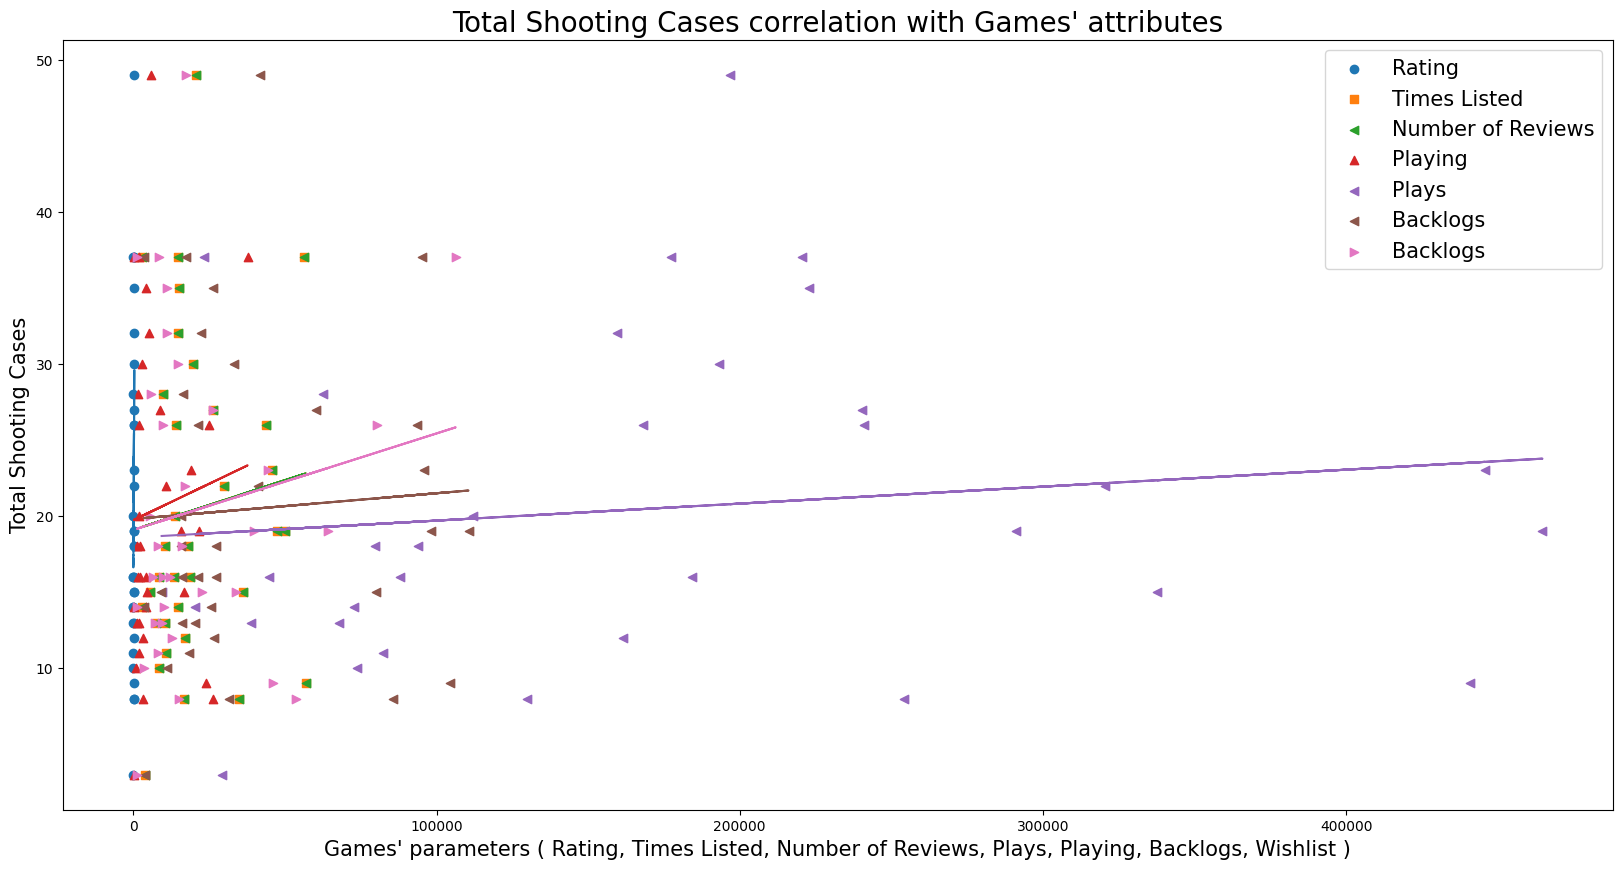

In [188]:
date = pd.to_datetime(shootingcase_nonvio_games["Date"], format = "%Y")
# #game_date = shootingcase_nonvio_games["Release Date"]
x = shootingcase_nonvio_games["Total_shooting_case"]
y_1 = shootingcase_nonvio_games["Rating"]
y_2 = shootingcase_nonvio_games["Times Listed"]
y_3 = shootingcase_nonvio_games["Number of Reviews"]
y_4 = shootingcase_nonvio_games["Plays"]
y_5 = shootingcase_nonvio_games["Playing"]
y_6 = shootingcase_nonvio_games["Backlogs"]
y_7 = shootingcase_nonvio_games["Wishlist"]


plt.figure(figsize=(20,10))
# Rating
plt.scatter(y_1,x, label = "Rating")
m,b = np.polyfit(y_1,x, 1)
plt.plot(y_1, m*y_1+b)

# Times Listed
plt.scatter(y_2,x, label = "Times Listed", marker = "s")
m1,b1 = np.polyfit(y_2,x, 1)
plt.plot(y_2,m1*y_2+b1)

# Number of reviews
plt.scatter(y_3,x, label = "Number of Reviews", marker = "<")
m2,b2 = np.polyfit(y_2,x, 1)
plt.plot(y_2,m2*y_2+b2)

# Playing
plt.scatter(y_5,x, label = "Playing", marker = "^")
m3,b3 = np.polyfit(y_5,x, 1)
plt.plot(y_5,m3*y_5+b3 )

# Plays
plt.scatter(y_4,x, label = "Plays", marker = "<")
m4,b4 = np.polyfit(y_4,x, 1)
plt.plot(y_4,m4*y_4+b4)

# Backlogs
plt.scatter(y_6,x, label = "Backlogs", marker = "<")
m6,b6 = np.polyfit(y_6,x, 1)
plt.plot(y_6,m6*y_6+b6)

# Wishlist
plt.scatter(y_7,x, label = "Backlogs", marker = ">")
m7,b7 = np.polyfit(y_7,x, 1)
plt.plot(y_7,m7*y_7+b7)

plt.title("Total Shooting Cases correlation with Games' attributes", fontsize = "20")
plt.xlabel("Games' parameters ( Rating, Times Listed, Number of Reviews, Plays, Playing, Backlogs, Wishlist )", fontsize = "15")
plt.ylabel("Total Shooting Cases", fontsize = "15")
plt.legend(fontsize = "15")
#plt.scatter(shootingcase_nonvio_games["Rating"], shootingcase_nonvio_games.iloc[:, 14])

# **Plotly Plots**

In [186]:
school_shooting_y_values = ["Total_shooting_case", "Rating","Times Listed", "Number of Reviews",
                           "Plays", "Playing","Backlogs", "Wishlist" ]
school_shooting_games_graph = px.line(shootingcase_all_games, x = "Date", y = school_shooting_y_values,
                                     title = "Total Shooting Crimes in America and Games Attributes Over 33 Years",
                                     labels = {"value" : "Total Crimes and Games Attributes",
                                             "Date" : "Year"})

school_shooting_games_graph.update_layout(
    title=dict(
        text="Total Shooting Crimes in America and Games Attributes Over 33 Years",
        font=dict(size=25)  # Adjust the font size as needed
    ),
    width = 1200,
    height = 600
)
school_shooting_games_graph.update_xaxes(title_font=dict(size=20))  # Adjust the font size as needed

# Update y-axis label font size
school_shooting_games_graph.update_yaxes(title_font=dict(size=20))


school_shooting_games_graph.show()

In [187]:
school_shooting_x_values = ["Rating","Times Listed", "Number of Reviews",
                           "Plays", "Playing","Backlogs", "Wishlist"]
school_shooting_games_scatter = px.scatter(shootingcase_all_games, x = school_shooting_x_values, y = "Total_shooting_case",
                                          title = "Scatter Plot of Total Shooting Case Against All Games Attributes",
                                          labels = {"Total_shooting_case" : "Total Shooting Cases over 33 Years ",
                                                   "value" : "Games Attributes"})
school_shooting_games_scatter.update_layout(
    title = dict(text="Scatter Plot of Total Shooting Case Against All Games Attributes",
        font=dict(size=25)  # Adjust the font size as needed
    ),
    width = 1200,
    height = 600
)
school_shooting_games_scatter

## **Checking if they have linear relationship with the games attribute or not ( using corr values > 0.5**

In [ ]:
rating_corr_values = []
tl_corr_values = []
nr_corr_values = []
plays_corr_values = []
playing_corr_values = []
backlog_corr_values = []
wishlist_corr_values = []
def correlation_for_all_columns(column_to_compare,empty_list_storage, dataset):
    correlation_data = []
    try:
        for i in range(3, 53):
            column_names = dataset.columns[i]
            column_values = dataset[column_names]
            correlation = column_values.corr(dataset[column_to_compare])
            correlation_data.append((column_names,column_to_compare, correlation))
            if abs(correlation) > 0.5:
                empty_list_storage.append(column_names)
    except:
        print("One of the input might be incorrect.\n")
        print("Check your column name to make sure that it exists in the same dataset that you provided\n")

    correlation_df = pd.DataFrame(correlation_data, columns=['Column','Compare-to', 'Correlation'])
    return correlation_df



correlation_for_all_columns("Rating",rating_corr_values, shootingcase_vio_games)
correlation_for_all_columns("Times Listed",tl_corr_values, shootingcase_vio_games)
correlation_for_all_columns("Number of Reviews",nr_corr_values, shootingcase_vio_games)
correlation_for_all_columns("Plays",plays_corr_values, shootingcase_vio_games)
correlation_for_all_columns("Playing",playing_corr_values, shootingcase_vio_games)
correlation_for_all_columns("Backlogs",backlog_corr_values, shootingcase_vio_games)
correlation_for_all_columns("Wishlist",wishlist_corr_values, shootingcase_vio_games )

,Column,Compare-to,Correlation
0,New York,Wishlist,-0.328666
1,Tennessee,Wishlist,0.007162
2,Nevada,Wishlist,-0.025304
3,Texas,Wishlist,-0.036664
4,California,Wishlist,-0.061553
5,Iowa,Wishlist,0.053745
6,Ohio,Wishlist,-0.043738
7,Nebraska,Wishlist,-0.118050
8,Arizona,Wishlist,0.250987
9,Mississippi,Wishlist,0.069901


In [ ]:
all_game_rating_corr_values = []
all_game_tl_corr_values = []
all_game_nr_corr_values = []
all_game_plays_corr_values = []
all_game_playing_corr_values = []
all_game_backlog_corr_values = []
all_game_wishlist_corr_values = []

correlation_for_all_columns("Rating",all_game_rating_corr_values, shootingcase_all_games )
correlation_for_all_columns("Times Listed",all_game_tl_corr_values, shootingcase_all_games )
correlation_for_all_columns("Number of Reviews",all_game_nr_corr_values, shootingcase_all_games )
correlation_for_all_columns("Plays",all_game_plays_corr_values, shootingcase_all_games )
correlation_for_all_columns("Playing",all_game_playing_corr_values, shootingcase_all_games )
correlation_for_all_columns("Backlogs",all_game_backlog_corr_values, shootingcase_all_games )
correlation_for_all_columns("Wishlist",all_game_wishlist_corr_values, shootingcase_all_games )


,Column,Compare-to,Correlation
0,New York,Wishlist,-0.316458
1,Tennessee,Wishlist,0.001156
2,Nevada,Wishlist,-0.054946
3,Texas,Wishlist,-0.036764
4,California,Wishlist,-0.045065
5,Iowa,Wishlist,0.080088
6,Ohio,Wishlist,-0.010833
7,Nebraska,Wishlist,-0.126492
8,Arizona,Wishlist,0.265275
9,Mississippi,Wishlist,0.125811


In [ ]:
correlation_for_all_columns("Rating",rating_corr_values, shootingcase_nonvio_games)
correlation_for_all_columns("Times Listed",tl_corr_values, shootingcase_nonvio_games)
correlation_for_all_columns("Number of Reviews",nr_corr_values, shootingcase_nonvio_games)
correlation_for_all_columns("Plays",plays_corr_values, shootingcase_nonvio_games)
correlation_for_all_columns("Playing",playing_corr_values, shootingcase_nonvio_games)
correlation_for_all_columns("Backlogs",backlog_corr_values, shootingcase_nonvio_games)
correlation_for_all_columns("Wishlist",wishlist_corr_values, shootingcase_nonvio_games )

,Column,Compare-to,Correlation
0,New York,Wishlist,-0.296184
1,Tennessee,Wishlist,-0.002906
2,Nevada,Wishlist,-0.049416
3,Texas,Wishlist,-0.044652
4,California,Wishlist,-0.060269
5,Iowa,Wishlist,0.086483
6,Ohio,Wishlist,-0.002511
7,Nebraska,Wishlist,-0.133323
8,Arizona,Wishlist,0.257948
9,Mississippi,Wishlist,0.149254


## **Correlation Hypothesis Test**

In [ ]:
from scipy.stats import pearsonr

def multi_corr_hypothesis_test(list_of_correlation_column_names, values_to_test, dataset):
    result_data = {'Variable_1': [],'Variable_2' : [], 'p-value': [],'compare-to-0.05': [], 'Decision': []}

    for i in dataset.columns:
        if i in list_of_correlation_column_names:
            data1 = dataset[values_to_test].values
            data2 = dataset[i].values
            stat, p = pearsonr(data1, data2)

            result_data['Variable_1'].append(i)
            result_data['Variable_2'].append(values_to_test)
            result_data['p-value'].append(p)

            if p < 0.05:
                result_data['Decision'].append('Reject Null')
                result_data['compare-to-0.05'].append('smaller than')
            else:
                result_data['Decision'].append('Fail to Reject Null')
                result_data['compare-to-0.05'].append('larger than')

    result_df = pd.DataFrame(result_data)
    return result_df

## Non violence dataset merged ( Test on the variables that passed the assumption that they have linear relationship with each other )

- Null Hypothesis: The correlation in the population is equal to 0
- Alternative Hypothesis: The correlation in the population is not equal to 0 (there is a correlation between two variables)

In [ ]:
multi_corr_hypothesis_test(rating_corr_values, "Rating", shootingcase_nonvio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New Mexico,Rating,0.001836,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(tl_corr_values, "Times Listed", shootingcase_nonvio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


In [ ]:
multi_corr_hypothesis_test(nr_corr_values, "Number of Reviews", shootingcase_nonvio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


In [ ]:
multi_corr_hypothesis_test(plays_corr_values, "Plays", shootingcase_nonvio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New York,Plays,0.000668,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(playing_corr_values, "Playing", shootingcase_nonvio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New Mexico,Playing,0.001656,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(backlog_corr_values, "Backlogs", shootingcase_nonvio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,Alabama,Backlogs,0.122446,larger than,Fail to Reject Null


In [ ]:
multi_corr_hypothesis_test(wishlist_corr_values, "Wishlist", shootingcase_nonvio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,Kansas,Wishlist,0.000626,smaller than,Reject Null
1,New Mexico,Wishlist,0.000304,smaller than,Reject Null


## Violence dataset merged

In [ ]:
multi_corr_hypothesis_test(rating_corr_values, "Rating", shootingcase_vio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New Mexico,Rating,0.010621,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(tl_corr_values, "Times Listed", shootingcase_vio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


In [ ]:
multi_corr_hypothesis_test(nr_corr_values, "Number of Reviews", shootingcase_vio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


In [ ]:
multi_corr_hypothesis_test(plays_corr_values, "Plays", shootingcase_vio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New York,Plays,0.001059,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(playing_corr_values, "Playing", shootingcase_vio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New Mexico,Playing,0.005956,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(backlog_corr_values, "Backlogs", shootingcase_vio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,Alabama,Backlogs,0.002288,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(wishlist_corr_values, "Wishlist", shootingcase_vio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,Kansas,Wishlist,0.024619,smaller than,Reject Null
1,New Mexico,Wishlist,0.003761,smaller than,Reject Null


## All games dataset merged

In [ ]:
multi_corr_hypothesis_test(rating_corr_values, "Rating", shootingcase_vio_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New Mexico,Rating,0.010621,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(all_game_tl_corr_values, "Times Listed", shootingcase_all_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New York,Times Listed,0.002208,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(all_game_nr_corr_values, "Number of Reviews", shootingcase_all_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New York,Number of Reviews,0.002208,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(plays_corr_values, "Plays", shootingcase_all_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New York,Plays,0.000321,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(all_game_playing_corr_values, "Playing", shootingcase_all_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,New Mexico,Playing,0.001858,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(all_game_backlog_corr_values, "Backlogs", shootingcase_all_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


In [ ]:
multi_corr_hypothesis_test(all_game_wishlist_corr_values, "Wishlist", shootingcase_all_games)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,Kansas,Wishlist,0.002346,smaller than,Reject Null
1,New Mexico,Wishlist,0.000576,smaller than,Reject Null


## Fitting a Linear Model and its MSE

In [ ]:
# # split the dataset into training and testing set ( 70% / 30 % ratio)
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# predictors = shootingcase_nonvio_games.iloc[:,3:10]
# independence = pd.DataFrame(shootingcase_nonvio_games["Total_shooting_case"])
# x_train, x_test, y_train, y_test = train_test_split(predictors,independence,test_size = 0.5 , random_state = 5)

In [ ]:
# model = LinearRegression()
# model.fit(x_train, y_train)
# y_predict = model.predict(x_test) # Y hat

# R_square = model.score(x_test, y_test)
# mse = mean_squared_error(y_test, y_predict)

# print("R squared: %.4f" % R_square)
# print("MSE for this model is" ,mse)

# plt.scatter(y_test, y_predict)
# plt.xlabel("Testing values for Total Shooting Case")
# plt.ylabel("Predicted values for Total Shooting Case")
# plt.title("Predicted vs Testing total shooting case")

In [ ]:
# # intercept and Coefficient
# print(model.intercept_)
# print(model.coef_)

# shooting_case_formular = "Y = 0.0119505 + 0.81396629(x1) + -0.1141639(x2) + -0.1141639(x3) + 0.45950048(x4) + -0.12159156(x5) + -0.05925674(x6) + 0.20814473(x7)"
# shooting_case_formular

## **Linear Model Hypothesis Test**

In [ ]:
print("Assumptions checked\n")
print("Rating and Playing have moderate linear correlation with New Mexico school shooting case\n")
print("Their variances are also equal. All of their variances are approx 1.0 after normalizing")
print("Residual and Predicted values are also independent\n")

import statsmodels.api as sm
X = shootingcase_nonvio_games[["Rating", "Playing"]]
X = sm.add_constant(X)
y = shootingcase_nonvio_games["New Mexico"].values

# Fit the linear regression model
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

Assumptions checked

Rating and Playing have moderate linear correlation with New Mexico school shooting case

Their variances are also equal. All of their variances are approx 1.0 after normalizing
Residual and Predicted values are also independent

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     6.008
Date:                Mon, 09 Oct 2023   Prob (F-statistic):            0.00624
Time:                        06:55:56   Log-Likelihood:                -22.070
No. Observations:                  34   AIC:                             50.14
Df Residuals:                      31   BIC:                             54.72
Df Model:                           2                                         
Covariance Type:            nonrobust 

In [ ]:
import statsmodels.api as sm
X = shootingcase_nonvio_games[["Plays"]]
X = sm.add_constant(X)
y = shootingcase_nonvio_games["New York"].values

# Fit the linear regression model
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     14.20
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           0.000668
Time:                        06:55:56   Log-Likelihood:                -41.718
No. Observations:                  34   AIC:                             87.44
Df Residuals:                      32   BIC:                             90.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4265      0.247      5.781      0.0

In [ ]:
import statsmodels.api as sm
X = shootingcase_nonvio_games[["Backlogs"]]
X = sm.add_constant(X)
y = shootingcase_nonvio_games["Alabama"].values

# Fit the linear regression model
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.517
Date:                Mon, 09 Oct 2023   Prob (F-statistic):              0.122
Time:                        06:55:56   Log-Likelihood:                -54.747
No. Observations:                  34   AIC:                             113.5
Df Residuals:                      32   BIC:                             116.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2456      0.331      0.741      0.4

In [ ]:
import statsmodels.api as sm
X = shootingcase_nonvio_games[["Kansas", "New Mexico"]]
X = sm.add_constant(X)
y = shootingcase_nonvio_games["Wishlist"].values

# Fit the linear regression model
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     12.79
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           8.89e-05
Time:                        06:55:56   Log-Likelihood:                -380.61
No. Observations:                  34   AIC:                             767.2
Df Residuals:                      31   BIC:                             771.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.473e+04   3469.421      4.246      0.0

## All games linear hypothesis test
- all the tests belows passed the assumptions for linear regression hypothesis test.
- their variances are approximately the same
- residual and predictors values are indepedent
- they all have linear relationship

In [ ]:
# Alll games dataset
X2 = shootingcase_all_games[["Times Listed", "Number of Reviews", "Plays"]]
X2 = sm.add_constant(X2)
y2 = shootingcase_all_games["New York"].values

# Fit the linear regression model
model2 = sm.OLS(y2, X2)
result2 = model2.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     7.910
Date:                Mon, 09 Oct 2023   Prob (F-statistic):            0.00168
Time:                        06:55:56   Log-Likelihood:                -40.727
No. Observations:                  34   AIC:                             87.45
Df Residuals:                      31   BIC:                             92.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.633e-17      0.14

In [ ]:
# Alll games dataset
X2 = shootingcase_all_games[["Playing", "Rating"]]
X2 = sm.add_constant(X2)
y2 = shootingcase_all_games["New Mexico"].values

# Fit the linear regression model
model2 = sm.OLS(y2, X2)
result2 = model2.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     5.775
Date:                Mon, 09 Oct 2023   Prob (F-statistic):            0.00738
Time:                        06:55:56   Log-Likelihood:                -42.353
No. Observations:                  34   AIC:                             90.71
Df Residuals:                      31   BIC:                             95.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.551e-17      0.151  -3.68e-16      1.0

In [ ]:
# Alll games dataset
X2 = shootingcase_all_games[["Kansas", "New Mexico"]]
X2 = sm.add_constant(X2)
y2 = shootingcase_all_games["Wishlist"].values

# Fit the linear regression model
model2 = sm.OLS(y2, X2)
result2 = model2.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     10.21
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           0.000392
Time:                        06:55:56   Log-Likelihood:                -39.134
No. Observations:                  34   AIC:                             84.27
Df Residuals:                      31   BIC:                             88.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-17      0.137  -5.05e-16      1.0

# Answering for Does the creation of games impact the school shooting rate over the year ?

 In order to answer this question, I used 2 major datasets found on Kaggle. The first dataset include information regading school shootings from 1990 to 2023 ( present ). This dataset was created by combinding information from the research did by data scientists Adam R. Pah and Luís Amaral and sociologist John L. Hagan on school shootings with Wikipedia articles. The second dataset is the information about the most popular games since 1980 to 2023 ( present ).

 Both dataset have missing values and information that is not important to answer this question. So the first step I did was to clean both the datasets. For school shooting dataset, I only keep the columns : Date,State,Fatalities,Wounded. Then, after checking if there are any NA values, I decided the best method to impute those values or omit it. In this case, I replaced all the NA values in the wounded column with the mode of that column. This reason I did this because I believe every single case of school shooting is important to this analysis, so omitting it might change the result of the analysis. Then I created 52 state variables to hold the names of 52 states mentioned in the States column. Since each row represent 1 school shooting case, I made a for loop to create new columns ( dummy varaibles ) representing shooting cases within only those states. For example, if the States column mention "California" then it will the value "1" to that same row in the new column name "California", if not then it would just be "0" representing no shooting case. After that, I group the dataset by the year in the school shooting date column and each group will sum up their values.

 For the games dataset, I only kept the columns: Title,Release,Date,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist. I imputed the NAs in the Rating columns by replacing it with the column median. Since the information the rating of popular games, replacing it with 0 wouldn't be true, because it is rare for a popular game to receive a complete 0. I chose the mean to be the value to replace the NAs because out of all the imputation methods, I believe the mean would be the best choice to not give the analysis a bias. Additionally, I also removed the date and month, and only keep the years for both release date and the shooting case date so I can merge both dataset together later on using inner join. For the games dataset, there were also 2 games that didn't release and 2 games that will release in 2024 and 2025, so I removed it since it would become outliers for a question that examine whether released games impact school shooting up until 2023. After remove, I sorted all the releasing dates in an ascending order. After finish cleaning the data, I started the analysis. I splitted the games dataset into subsets. A violence games subset by only taking the games with the genres "Brawler" and "Shooter". A non-violence game subset with any other genres. Then I group by the released date column, and sum up all the values within that year.

 I first want to examine the relationship between school shooting and non-violence games. My first hypothesis is that there shouldn't be any correlation. I then joined both dataset together using inner join parameter from the function merge included in the Pandas library. After joining, I have 34 rows representing the school shooting cases and games information starting 1990 to 2023.

 Next step, I normalized all the columns related to games dataset because majority of the columns added up to thousands such as the "Time listed" and the "Playings" column. The difference is big compare to the shooting cases columns. I did this so the analysis can be easier to identify the relationship. Then I created 7 "for" loops to calculate the correlation coefficient of each games information columns to states school shooting column. I stored the names of the columns that have a correlation higher than 0.5 to different variables. This is the all the columns that have moderate to high correlation to each other.

Rating : New Mexico

Number of review : No correlation with any of the States

plays : New York

playing : New Mexico

backlog : Alabama

Wishlist : New Mexico, Kansas

 Now I know which columns correlation with each other, I then performed a Pearson Correlation Hypothesis for all of the column. Since all variables are independece and have linear relationship, it is reasonable to use this hypothesis test to check for their relationship. As a result, all of the tests have a p values lower than 0.05, which indicate that all of them have sufficient evidence to reject the null hypothesis ( which is the correlation in the population = 0 ( no correlation )) and accept the alternate hypothesis ( which is the correlation in the population different from 0 ( there is a correlation between 2 variable )).


 In order to validate this finding that there are relationship ship between school shooting and video games. I performed a multivariable linear regression hypothesis test for "non violence games merge dataset". From the tests above, looking at the "P>|t|" column ( this is the P values value ), it indicates that only Plays attributes might be statsitically impact on the school shooting in New York. Additionally, the test for the attributes Wishlist might also indicate that there's statsitically impact on school shooting in Kansas and New Mexico.

 Interestingly, when I examine the merged dataset between violence games sub dataset and school shooting in the US. They have exactly the same correlation values between games and school shooting cases in different states. The only difference is their multivariable linear hypothesis tests result. For violence games merged dataset, the tests indicate Plays attributes might have statistically impact on New York school shooting. Backlogs and Wishlist attribute also could have statistically impact on Alabama and New Mexico.

 After finding the correlation between school shooting and violence / non-violence games, I now examine the merged dataset with all the games ( both violence and non violence ). With the same statistical methods, here are all the moderate to high correlation between games attributes and school shooting in different states for all games merged dataset.

Rating : New Mexico

Number of review : New York

plays : New York

playing : New York

backlog : No Correlation with any of the States

Wishlist : New Mexico, Kansas

 Comparing to the violence / non-violence correlation values above, we can see now that the games dataset is bigger ( since it includes both non-violence and violence games information ), the correlation also changed a bit. Specifically, it seems like Number of reviews, Plays and Playing attributes are all have correlation with school shooting in New York. On the other hand, there are some relationships that are the same which is New Mexico and Rating / Wishlist, and Kansas with Wishlist. Similarly, I also performed Pearson Correlation hypothesis tests on these values and all of the tests have sufficient evidence to reject the null hypothesis which mean the 2 variables might have correlation. Then I perform multivariable linear regression hypothesis test, I found that only Plays attributes is statistically impact to school shooting in New York, and Wishlist with New Mexico and Kansas. All other ganes attributes didn't have sufficient evidence indicate that it has statistically impact on any of the states' school shooting cases.

### Conclusion
 From the evidence above, my conclusion for this question is that video games mainly DOESN'T HAVE any impact on school shooting in the US. The reason I stated this is because none of the games attributes has any correlation with the Total Shooting Case column in the merged dataset.

 However, the reason that I also didn't stated that "video games certainly has ZERO impact on school shooting in the US" because there are statistically evidence showed above that some game attributes might have some slight correlation ( 0.5 or more ) with certain states school shooting cases.

 Another conclusion from these evidence is that the correlations don't change depend on violence or non-violence games. I concluded this because the statistical tests showed the exact same correlations for violence and non violence games merged dataset. I believe there is no different between the impact of violence games or non-violence games on school shootings. Since both merged dataset showed little differences, the violence games don't have more or less impact than the non violence games. Since the merged dataset with all games included more information, this also mean that the results from all games merged dataset are more reliable and more accurate.  

# Merge SAT dataset from CAL and NY school

In [ ]:
# this part combine 2 SAT dataset from CAL and NY school
# I attach the NY score at the bottom of the Cal score, then repeat it for 4 columns belows
# then I created a new dataframe using those 4 columns
student_enroll = pd.concat([Sat["NumTstTakr"],NY_sat["Student Enrollment"]], axis = 0, ignore_index = True)
Math = pd.concat([Sat["AvgScrMath"],NY_sat["Average Score (SAT Math)"]], axis = 0, ignore_index = True)
Reading = pd.concat([Sat["AvgScrRead"],NY_sat["Average Score (SAT Reading)"]], axis = 0, ignore_index = True)
Writing = pd.concat([Sat["AvgScrWrit"],NY_sat["Average Score (SAT Writing)"]], axis = 0, ignore_index = True)

# not sure if I should add this yet
#Percent_test = pd.concat([Sat["NumTstTakr"],NY_sat["Student Enrollment"]], axis = 0, ignore_index = True)
Total_Sat = pd.DataFrame([student_enroll,Math, Reading, Writing])
Total_Sat = Total_Sat.transpose() # get the transpose of the dataframe so the row become the columns
# rename columns
Total_Sat = Total_Sat.rename(columns = {0:"Student Enroll", 1 : "SAT Avg Math score",
                2: "SAT Avg Reading score", 3 : "SAT Avg Writing score"})

# Clean out the weird * symbol, by replacing it with nan
Total_Sat["SAT Avg Math score"].replace("*", np.nan, inplace=True)
# drop the na
Total_Sat = Total_Sat.dropna()
# reset index
Total_Sat = Total_Sat.reset_index(drop = True)
# transform all the test scores to actual float value because it was string before
Total_Sat['SAT Avg Math score'] = Total_Sat['SAT Avg Math score'].astype(float)
Total_Sat['SAT Avg Reading score'] = Total_Sat['SAT Avg Reading score'].astype(float)
Total_Sat['SAT Avg Writing score'] = Total_Sat['SAT Avg Writing score'].astype(float)
Total_Sat

,Student Enroll,SAT Avg Math score,SAT Avg Reading score,SAT Avg Writing score
0,214262.0,494.0,484.0,477.0
1,8611.0,534.0,517.0,515.0
2,95.0,378.0,395.0,388.0
3,92.0,376.0,391.0,386.0
4,472.0,543.0,527.0,514.0
...,...,...,...,...
2101,381.0,372.0,362.0,352.0
2102,368.0,357.0,381.0,376.0
2103,683.0,427.0,430.0,423.0
2104,397.0,399.0,403.0,405.0


**Do games impact students academically ?**
- Here we can use linear regression hypothesis testing
- Reason : to confirm if our beta coefficients are significant in a linear regression model
- Caution : Use this only when it passes all the assumptions

**Does video games impact the criminal rate over the year ?¶**
- We can construct many multi variable linear models hypothesis tests for different type of crimes with the predictors ( rating, time listed, numbers of reviews, playings, plays, wishlist ) from the games dataset
- Then we can see if any of these game factors contribute to the prediction of crime rate or if any of them are.
- I think we can try to build model and use what we learn in 35C to reduce to the most relevant predictors then get the MSE.
- If the MSE is good, it means games can predict the criminal rate over the year which mean games does impact the criminal rate

## Do different types of genres of games affect the crime rate ?
- Maybe we can divide the genres into 2 general categories ( violence and nonviolence )
- Then we can proceed to perform 2 ways anova test
- I think it is posible to use logistic regression for the genre to see what’s the percentage of some commit a crime if they play violence game

Correlation :

Rating : 'violent_crime','homicide','robbery','property_crime','burglary','larceny','motor_vehicle_theft'

Time listed : 'robbery', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft'

Number of Reviews : 'robbery', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft

Plays: 'violent_crime','homicide','robbery','property_crime','burglary','larceny','motor_vehicle_theft'

Playing: 'robbery', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft'

Backlogs : 'robbery', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft'

Wishlist : 'robbery', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft'

##  Merge crimes rate and games dataset

In [ ]:
# merge the crimes rate and games dataset
games_crimes = pd.merge(crimes_rate, all_games, left_on = "year", right_on = "Release Date", how = "inner")
# violance games x crimes
vio_games_crimes = pd.merge(crimes_rate, violence_games, left_on = "year", right_on = "Release Date", how = "inner")
# non violence games x crimes
non_vio_games_crimes = pd.merge(crimes_rate, non_vio_games, left_on = "year", right_on = "Release Date", how = "inner")
#games_crimes =  games_crimes.fillna(0)
games_crimes.head()

,year,state_name,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,...,motor_vehicle_theft,Total_Crime,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
0,1980,Total US Population,225349264,1344520,23040,82990.0,565840,672650,12063700,3795200,...,1131700,26816540.0,1980,3.4,427.0,427.0,5200.0,7.0,108.0,31.0
1,1982,Total US Population,231664458,1322390,21010,78770.0,553130,669480,11652000,3447100,...,1062400,25948780.0,1982,3.6,198.0,198.0,1600.0,1.0,45.0,38.0
2,1985,Total US Population,237923795,1327767,18976,87671.0,497874,723246,11102590,3073348,...,1102862,24860714.0,1985,3.5,1500.0,1500.0,18000.0,59.0,733.0,237.0
3,1986,Total US Population,240132887,1489169,20613,91459.0,542775,834322,11722700,3241410,...,1224137,26423738.0,1986,13.1,3432.0,3432.0,25700.0,325.0,3979.0,1348.0
4,1987,Total US Population,242288918,1483999,20096,91111.0,517704,855088,12024709,3236184,...,1288674,27017416.0,1987,8.3,1739.0,1739.0,11800.0,110.0,2091.0,655.0


## Normalizing and Mutate

In [ ]:
for i in games_crimes.columns[2:]:
    normalize_and_mutate_column(i, games_crimes)
    normalize_and_mutate_column(i, vio_games_crimes)
    normalize_and_mutate_column(i, non_vio_games_crimes)

In [ ]:
non_vio_games_crimes.head()

,year,state_name,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,...,motor_vehicle_theft,Total_Crime,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
0,1980,Total US Population,-1.804736,-0.504540,1.486862,-1.438488,0.915449,-1.609257,0.971871,2.183066,...,-0.024041,0.813585,-1.885943,-1.199654,-1.076747,-1.076747,-1.036739,-0.716634,-0.930511,-0.874128
1,1982,Total US Population,-1.602637,-0.602253,0.849353,-2.065874,0.804376,-1.633640,0.728911,1.641687,...,-0.245799,0.583629,-1.705166,-1.196494,-1.092490,-1.092490,-1.064493,-0.717563,-0.932553,-0.873658
2,1985,Total US Population,-1.402325,-0.578511,0.210588,-0.742565,0.321491,-1.220068,0.404684,1.060412,...,-0.116322,0.295293,-1.434001,-1.198074,-1.002984,-1.002984,-0.938055,-0.708582,-0.910251,-0.860273
3,1986,Total US Population,-1.331630,0.134141,0.724677,-0.179404,0.713883,-0.365664,0.770634,1.321789,...,0.271755,0.709492,-1.343612,-1.046399,-0.870169,-0.870169,-0.878690,-0.667398,-0.805027,-0.785547
4,1987,Total US Population,-1.262632,0.111314,0.562317,-0.231141,0.494786,-0.205930,0.948861,1.313661,...,0.478271,0.866817,-1.253224,-1.168055,-1.010202,-1.010202,-1.000503,-0.705176,-0.883702,-0.846485


In [ ]:
rating_crimes_values = []
tl_crimes_values = []
nr_crimes_values = []
plays_crimes_values = []
playing_crimes_values = []
backlog_crimes_values = []
wishlist_crimes_values = []

def correlation_for_crimes_games(column_to_compare,empty_list_storage, dataset):
    correlation_data = []
    for i in range(3,13):
        column_names = dataset.columns[i]
        column_values = dataset[column_names]
        correlation = column_values.corr(dataset[column_to_compare])
        if abs(correlation) > 0.6:
            correlation_data.append((column_names,column_to_compare, correlation))
            empty_list_storage.append(column_names)

    correlation_df = pd.DataFrame(correlation_data, columns=['Column','Compare-to', 'Correlation'])
    return correlation_df

In [ ]:
correlation_for_crimes_games("Rating",rating_crimes_values,games_crimes)
#correlation_for_crimes_games("Times Listed",tl_crimes_values, games_crimes)
# correlation_for_crimes_games("Number of Reviews",nr_crimes_values, games_crimes)
# correlation_for_crimes_games("Plays",plays_crimes_values, games_crimes)
# correlation_for_crimes_games("Playing",playing_crimes_values, games_crimes)
# correlation_for_crimes_games("Backlogs",backlog_crimes_values, games_crimes)
# correlation_for_crimes_games("Wishlist",wishlist_crimes_values, games_crimes)

,Column,Compare-to,Correlation
0,violent_crime,Rating,-0.669958
1,homicide,Rating,-0.695189
2,robbery,Rating,-0.859231
3,property_crime,Rating,-0.948772
4,burglary,Rating,-0.897489
5,larceny,Rating,-0.911447
6,motor_vehicle_theft,Rating,-0.819183
7,Total_Crime,Rating,-0.934906


## Pearson Correlation Hypothesis Tests

In [ ]:
multi_corr_hypothesis_test(rating_crimes_values, "Rating", games_crimes)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision
0,violent_crime,Rating,5.749702e-06,smaller than,Reject Null
1,homicide,Rating,1.797885e-06,smaller than,Reject Null
2,robbery,Rating,1.001857e-11,smaller than,Reject Null
3,property_crime,Rating,4.320225e-19,smaller than,Reject Null
4,burglary,Rating,5.340777e-14,smaller than,Reject Null
5,larceny,Rating,4.619944e-15,smaller than,Reject Null
6,motor_vehicle_theft,Rating,5.719323e-10,smaller than,Reject Null
7,Total_Crime,Rating,2.557795e-17,smaller than,Reject Null


In [ ]:
multi_corr_hypothesis_test(tl_crimes_values, "Times Listed", games_crimes)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


In [ ]:
multi_corr_hypothesis_test(nr_crimes_values, "Number of Reviews", games_crimes)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


In [ ]:
multi_corr_hypothesis_test(plays_crimes_values, "Plays", games_crimes)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


In [ ]:
multi_corr_hypothesis_test(playing_crimes_values, "Playing", games_crimes)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


In [ ]:
multi_corr_hypothesis_test(backlog_crimes_values, "Backlogs", games_crimes)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


In [ ]:
multi_corr_hypothesis_test(wishlist_crimes_values, "Wishlist", games_crimes)

,Variable_1,Variable_2,p-value,compare-to-0.05,Decision


## Graphs

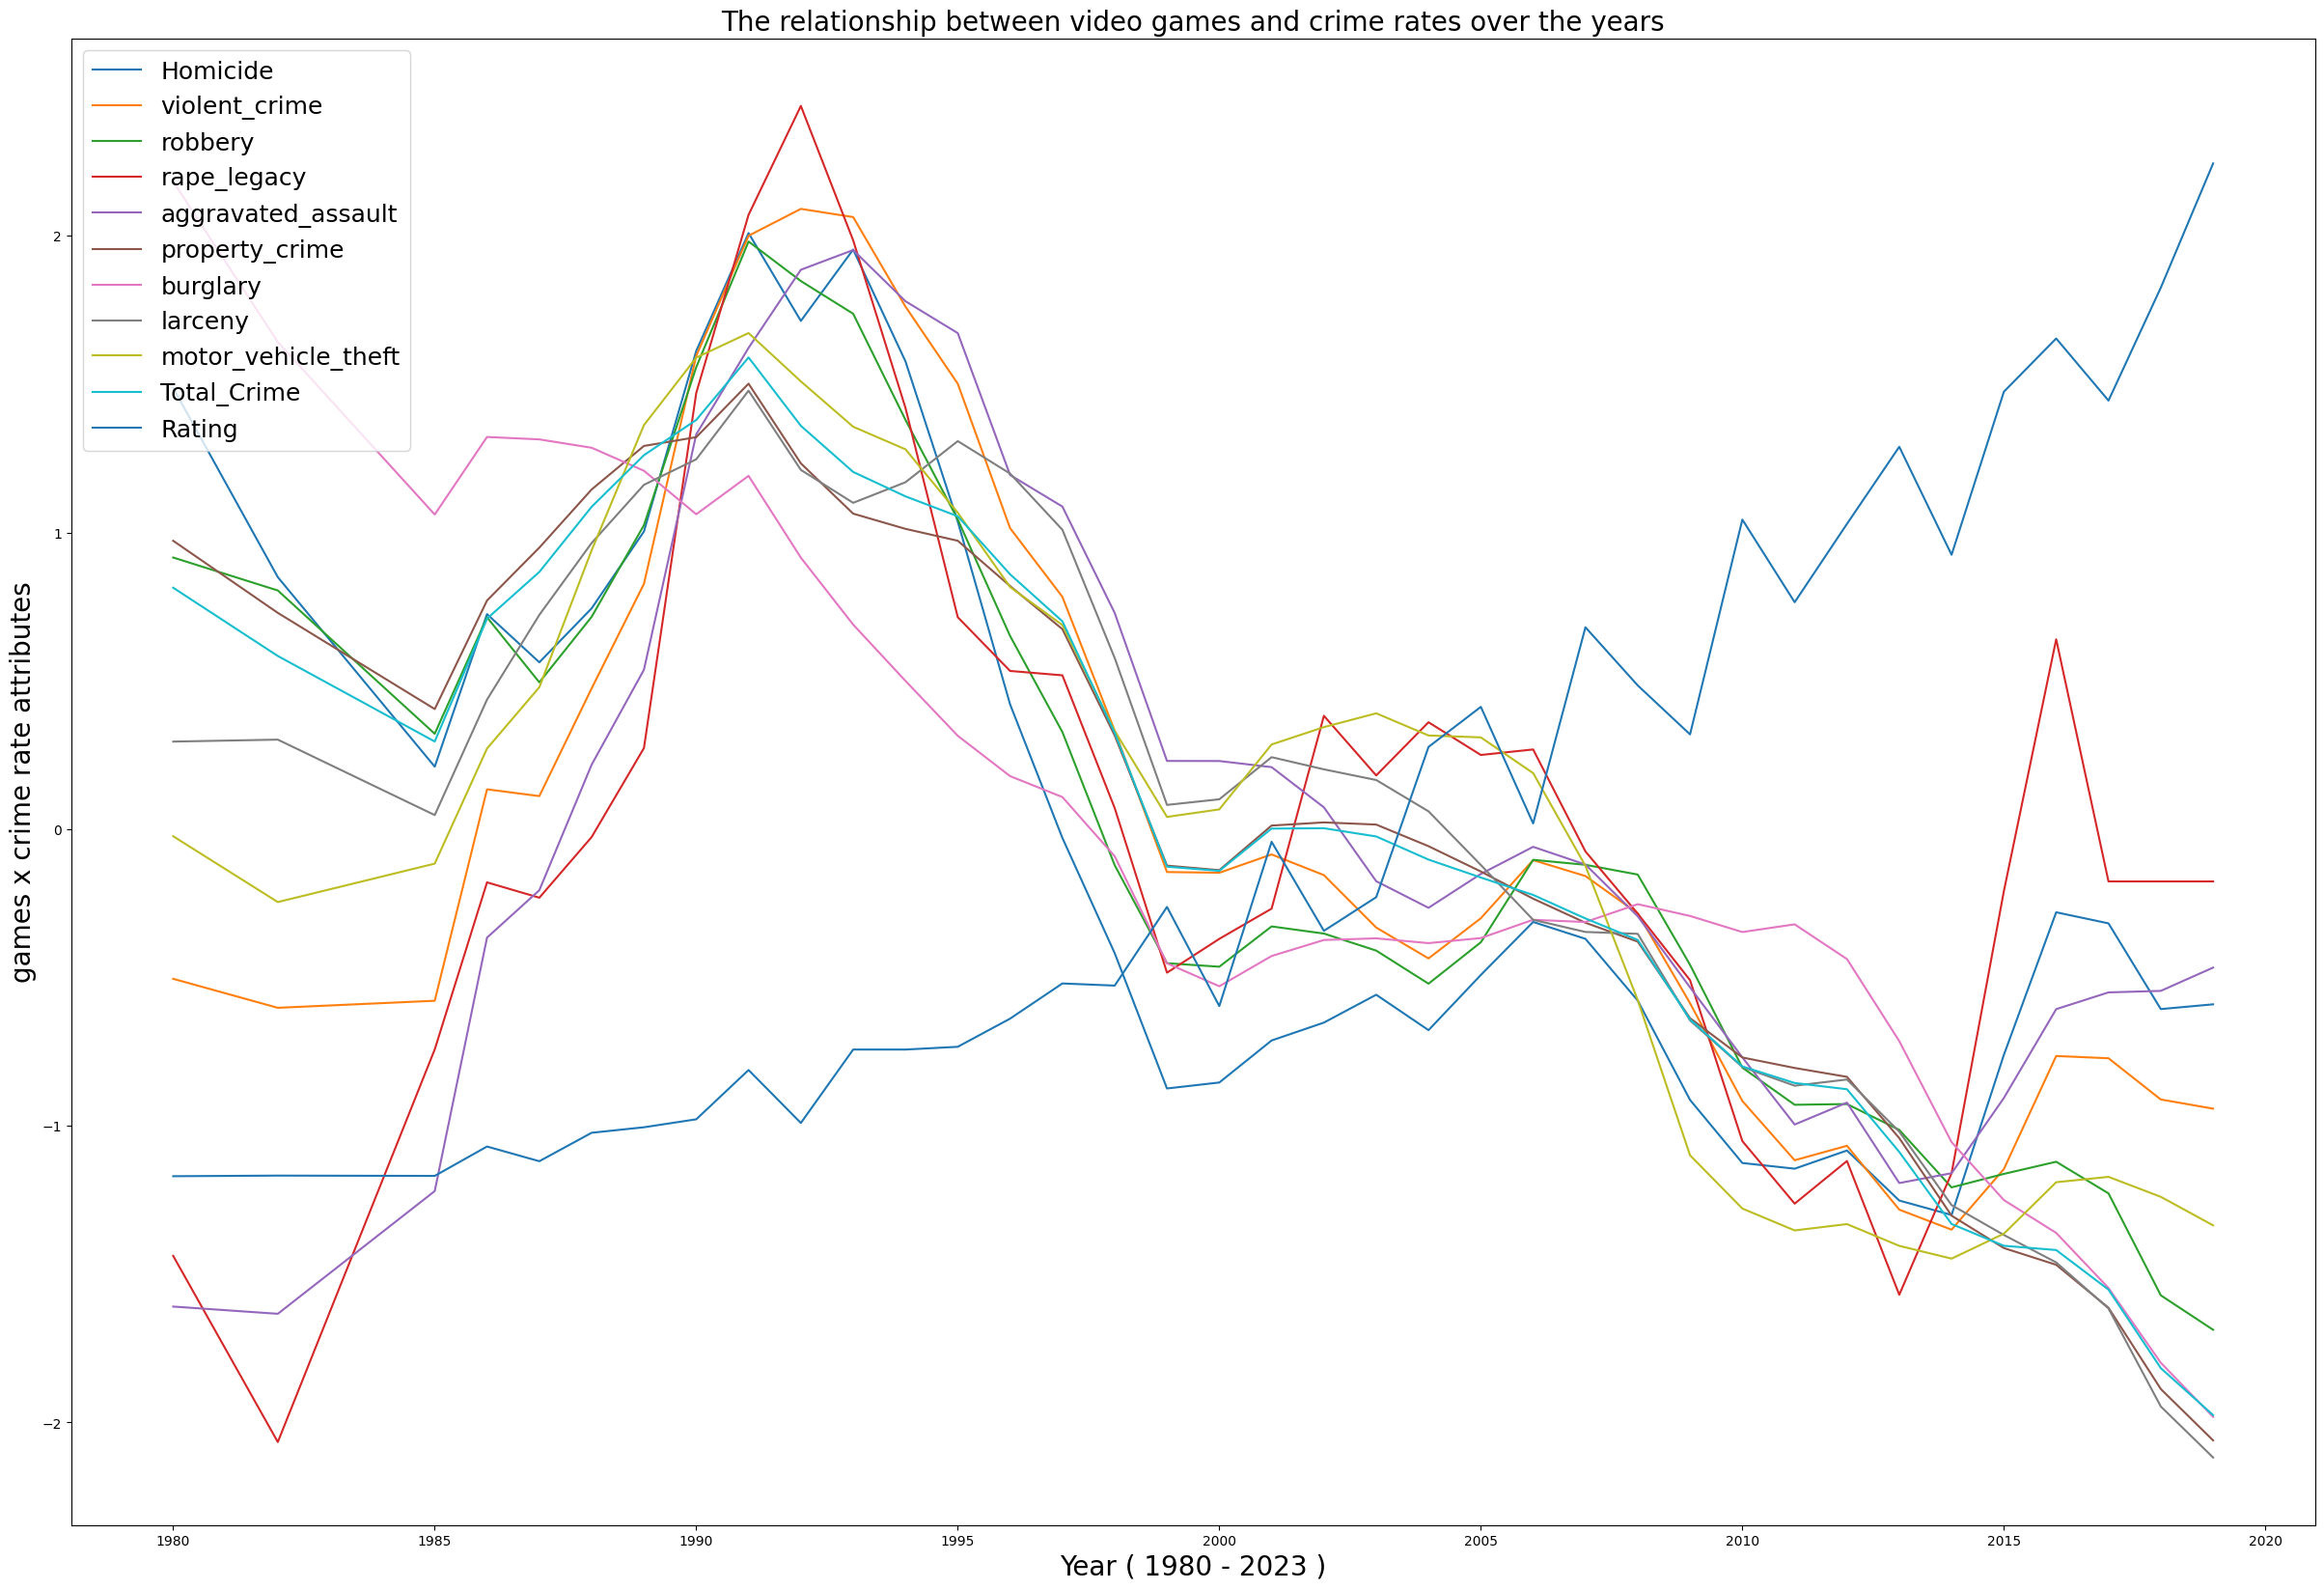

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(games_crimes["year"],games_crimes["homicide"],label = "Homicide" )
plt.plot(games_crimes["year"],games_crimes["violent_crime"], label = "violent_crime" )
plt.plot(games_crimes["year"],games_crimes["robbery"], label = "robbery" )
plt.plot(games_crimes["year"],games_crimes["rape_legacy"], label = "rape_legacy" )
plt.plot(games_crimes["year"],games_crimes["aggravated_assault"], label = "aggravated_assault" )
plt.plot(games_crimes["year"],games_crimes["property_crime"], label = "property_crime" )
plt.plot(games_crimes["year"],games_crimes["burglary"], label = "burglary" )
plt.plot(games_crimes["year"],games_crimes["larceny"], label = "larceny" )
plt.plot(games_crimes["year"],games_crimes["motor_vehicle_theft"], label = "motor_vehicle_theft" )
plt.plot(games_crimes["year"],games_crimes["Total_Crime"], label = "Total_Crime" )


plt.plot(games_crimes["year"],games_crimes["Rating"], label = "Rating")

plt.title("The relationship between video games and crime rates over the years", fontsize = 20)
plt.xlabel("Year ( 1980 - 2023 )", fontsize = 20)
plt.ylabel("games x crime rate attributes", fontsize = 20)
plt.legend(loc = "upper left",fontsize = 18)
plt.show()

In [ ]:
import plotly.express as px

plt.figure(figsize=(30,20))
crimes_and_game_attr = ["homicide","violent_crime","robbery" , "rape_legacy", "aggravated_assault", "property_crime",
                       "burglary" , "larceny","motor_vehicle_theft" ,"Total_Crime", "Times Listed", "Number of Reviews",
                       "Plays","Playing", "Backlogs","Wishlist"  ]
Time_series_graph = px.line(games_crimes,x = "year",y = crimes_and_game_attr, title = "Times Series of Games vs Crimes Rate",
                           labels = {"value" : "games x crime rate attributes"})

Time_series_graph.update_layout(
    title=dict(
        text="Times Series of Games vs Crimes Rate",
        font=dict(size=30)  # Adjust the font size as needed
    )
)
Time_series_graph.update_xaxes(title_font=dict(size=20))  # Adjust the font size as needed

# Update y-axis label font size
Time_series_graph.update_yaxes(title_font=dict(size=20))

Time_series_graph.show()


#px.line(games_crimes,x = "year",y = "Rating")

# plt.title("The relationship between video games and crime rates over the years", fontsize = 20)
# plt.xlabel("Year ( 1980 - 2023 )", fontsize = 20)
# plt.ylabel("games x crime rate attributes", fontsize = 20)
# plt.legend(loc = "upper left",fontsize = 18)
# plt.show()

<Figure size 3000x2000 with 0 Axes>

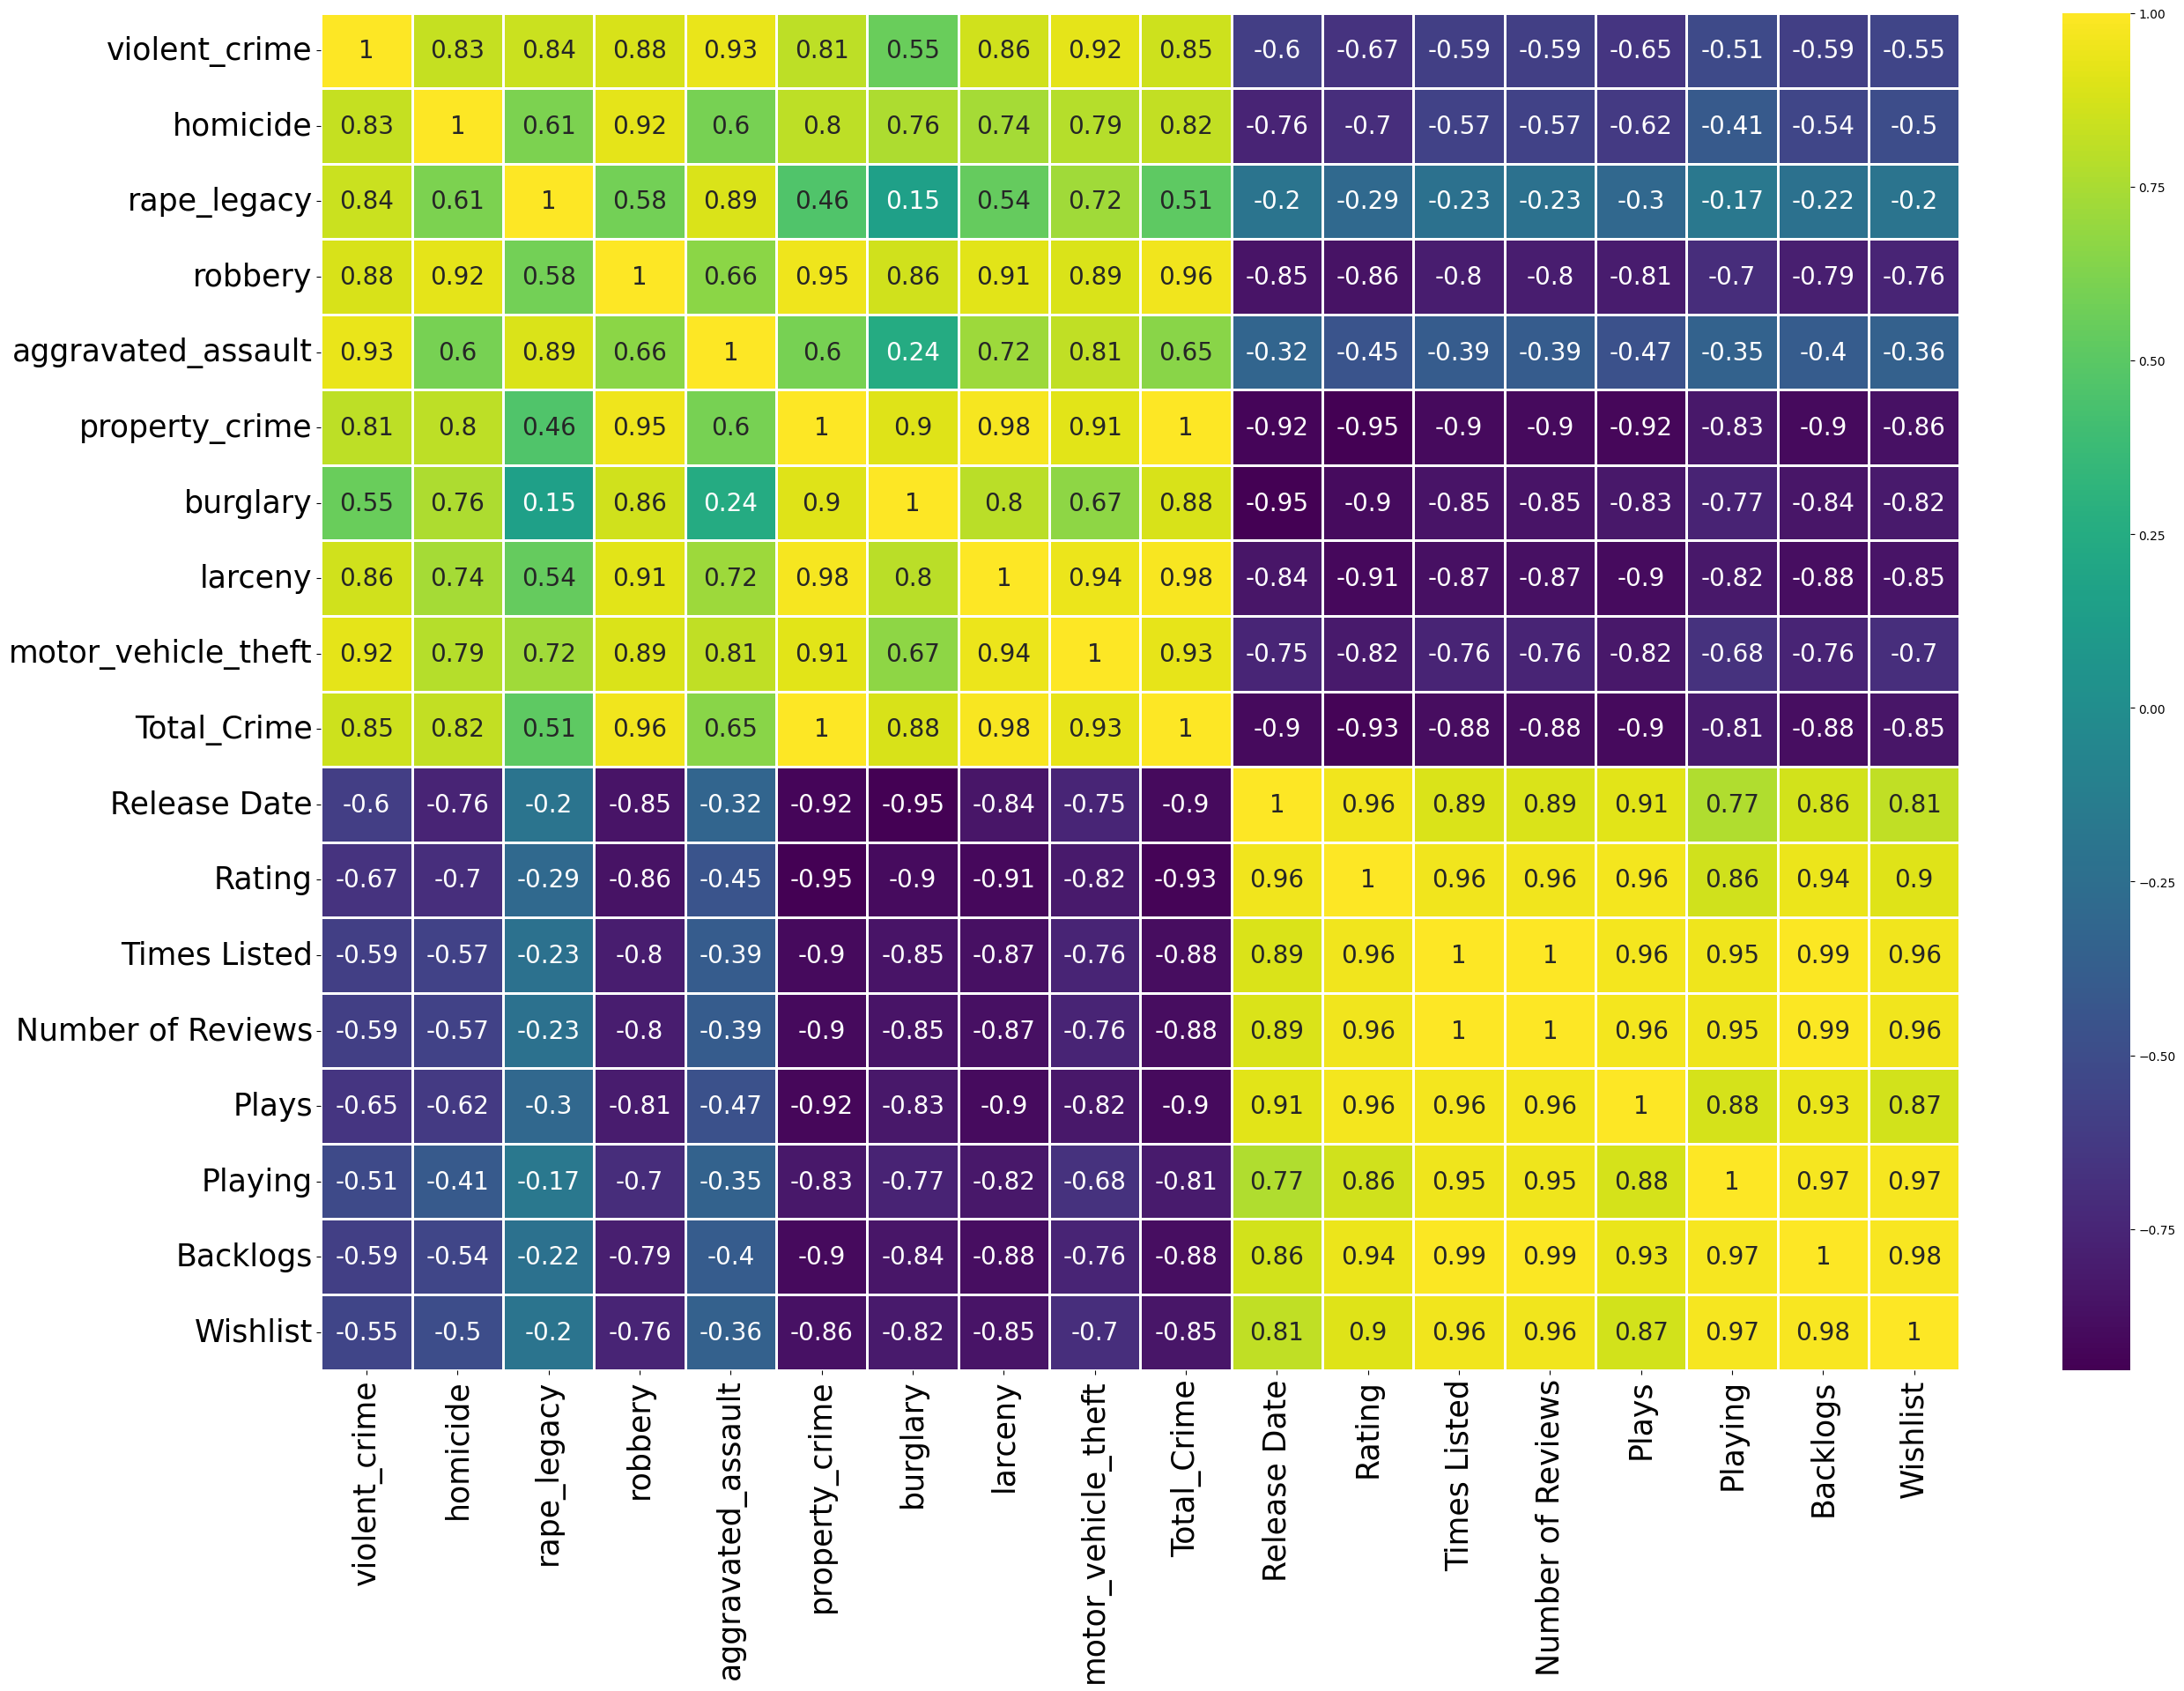

In [ ]:
import seaborn as sns
plt.figure(figsize = (30,20))
heatmap = sns.heatmap(games_crimes.iloc[:,3:].corr(), annot=True, linewidths=1, cmap="viridis", annot_kws={"size": 20})

# Set the fontsize for the values
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=25)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=25)

# Show the plot
plt.show()

## Building a linear model to test the predictor ( games attributes ) accuracy
- low MSE ( 0.1887320205871617 )
- R square close to 1 ( 0.7959 )
- seem like the game predictors are significant enough for us to make prediction regarding total crime commited in American each year

In [ ]:
# split the dataset into training and testing set ( 50% / 50 % ratio)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# All games
predictors_games_crimes = games_crimes.iloc[:,14:]
independence = pd.DataFrame(games_crimes["Total_Crime"])
x_train, x_test, y_train, y_test = train_test_split(predictors_games_crimes,
                                                    independence,
                                                    test_size = 0.5 , random_state = 5)

R squared: 0.7959
MSE for this model is 0.1887320205871617


Text(0.5, 1.0, 'Predicted vs Testing total shooting case')

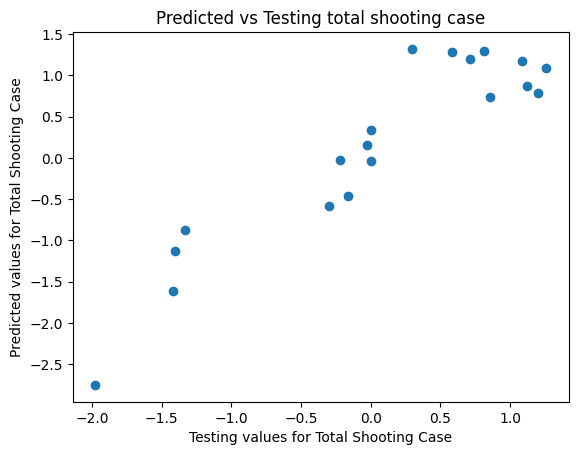

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test) # Y hat

R_square = model.score(x_test, y_test)
mse = mean_squared_error(y_test, y_predict)

print("R squared: %.4f" % R_square)
print("MSE for this model is" ,mse)

plt.scatter(y_test, y_predict)
plt.xlabel("Testing values for Total Shooting Case")
plt.ylabel("Predicted values for Total Shooting Case")
plt.title("Predicted vs Testing total shooting case")

In [ ]:
# intercept and Coefficient
print(model.intercept_)
print(model.coef_)

game_crime_formular = "Y = 0.04581964 + -1.57958913(x1) + -0.09234426(x2) + -0.09234426(x3) + 0.46371099(x4) + -0.4840229(x5) + 0.81998316(x6) + -0.11059148(x7)"
game_crime_formular

[0.04581964]
[[-1.57958913 -0.09234426 -0.09234426  0.46371099 -0.4840229   0.81998316
  -0.11059148]]


'Y = 0.04581964 + -1.57958913(x1) + -0.09234426(x2) + -0.09234426(x3) + 0.46371099(x4) + -0.4840229(x5) + 0.81998316(x6) + -0.11059148(x7)'

# Answer for does video games impact crimes rate in the US over the year ?

For this question, I used 2 major datasets found on Kaggle. The first dataset include information regading different type of crimes commited in the US from 1980 to 2020. The crimes that got mentioned in the dataset were : violent crime, homicide,rape,	robbery,aggravated assault, property crime,	burglary,	larceny,motor vehicle theft. The second dataset is the information about the most popular games since 1980 to 2023 ( present ). My hypothesis at the beginning is that games have negative impact on crimes, since society blamed violence video games as the cause of crimes.

Similarly to the process of answering question 1. Both datasets have some mising values and unnessary information. So I started the cleaning process for both the datasets. Since the games dataset is already cleaned to answer the question "Does games impact school shooting in the US ?", I won't need to redo the process and just reuse the dataset ( the process was mentioned in Question 1 answer ). For the crimes dataset, I removed the columns : "rape_revised", "state_abbr", "caveats" since those information were not needed to analyze this question. Then, after checking if there are any NA values, I decided the best method to impute those values. In this case, I replaced all the NA values in the rape column with the rounded mean of the column. The reason I did this because I believe every single case of rape is important to this analysis, so omitting it might change the result of the analysis and introduce biases. Then I added a new column name "total crime" which is the sum of all the crimes that were mentioned in the dataset. I checked if the process were correct by comparing it with the population and as long as it's smaller than the population then I know the process were done correctly. After that, I group the dataset by the year using the date column and each group of crime will sum up their values from each year ( 1980 - 2020 ).

After having both dataset cleaned, I now merged them together using inner join base on the year column in the crimes dataset and the release date column in the game dataset. By doing this, I will retain majority of the data from both dataset after joining. The only information that's missing are the game information from 2021 to 2023 since the crimes dataset only include crimes up to 2020, so 2021 - 2023 games information are also unimportant in this case.

After joining, I started the analyzing process by first normalizing the merged dataset so I can visualize the analysis easier. I did this because information regarding crimes from each year can be hundred of thousands cases compare to the games attributes that only go up to at most 20,000. After this, I checked their correlation coefficient between all the crimes and each games attributes. And here are the result of the crimes that have high correlation with the game attributes :


Rating : violent_crime, homicide, robbery, property_crime, burglary, larceny, motor_vehicle_theft, Total_Crime


Times Listed : robbery ( -0.796346 ) , property_crime (-0.902216), burglary (-0.853028), larceny (-0.874845), motor_vehicle_theft (-0.757761), Total_Crime (-0.884258)


Number of Reviews : robbery, property_crime , burglary, larceny, motor_vehicle_theft, Total_Crime


Plays : violent_crime , homicide, robbery , property_crime , burglary , larceny, motor_vehicle_theft, Total_Crime


Playing : robbery , property_crime, burglary, larceny, motor_vehicle_theft, Total_Crime


Backlogs : robbery, property_crime, burglary, larceny, motor_vehicle_theft, Total_Crime


Wishlist : robbery , property_crime, burglary, larceny, motor_vehicle_theft, Total_Crime


All the values above have correlation coefficient either larger than 0.6 or smaller than -0.6. Which mean these correlation are very high. However, I want to find further evidence that these values have correlation with each other, so I conducted pearson correlation hypothesis test for each games attributes and interestingly, all the correlation values I mentioned above passed the hypothesis test and the output showed there are sufficient evidences that these values correlation with each other.

Now I know they have correlation with each other so I create a time series graph using crimes information and Rating column from the games dataset from 1980 to 2020. Suprisingly, this graph indicate significant negative correlation between popularity in games over the year and the decrease of crimes rate. As you see above, the crime rate decreased significantly over the year and that the same time, the Rating in games increase which indicate as better games created, it might have impact on the decrease of crimes commited in the US. And the graph also show that crimes only started to decrease in the late 90s and dramatically decrease starting from 2000s. At the same time, the Rating in videos also rised dramatically late 1990s and continue to increase until today. This is understandable because as technology developed, new and better games will also created to match with the customer's needs. However, this also showed that videos might teach users how to become better person and motivate children in a positive way which led to the decrease of crimes.

As a final step to examine this question, I created a linear model to check whether the model can predict the total crimes commited in the US using the game's attributes. I check the performance of this model by looking at its R squared and the Mean Square Error ( MSE ) that the model produce. As a result, the R square is 0.7959, with a MSE of 0.18873. With the R square relatively high ( very close to 1 ) and a low MSE. This mean this model can perform well to use game attributes to predict total crimes in the US over the year. This also proved that the game's attributes are significant to predict total crimes.

## Conclusion

As for my hypothesis, this analysis proved my hypothesis was wrong. Although I thought there would be a correlation between games and crimes, it would be a positive correlation with better videos games will lead to more crimes since games will include violence aspects in it. However, the analysis proved that better games over the year might help the crime rate to lower. This analysis showed there is likely a negative corelation between video games and crimes, and more study should be conduct to answer the myth that society has questioning a long time " does games impact the children in a bad way".

A personal thought on why games could help lowering crimes is that as better games come out, people might just stay at home and enjoying their games and that distract them from having any thoughts on commit crimes or making a mistake that they will regret later. Games nowaday also have touching plot that teach you valuable lesson in life since the developer want to transfer a message to the user, not just having them playing the game only. And those plots might be a motivational source for certain group of users that feel related to the game characters.



**Does the popularity of the games have a higher impact on the crimes in different state ?**
- We can treat the popularity of games as categorical variable
- Use rating value : divide it to subgroup ( Nonpopular, Popular )
- Then we can use 2 ways anova tests to examine the crimes rate for different type of crimes
- So we will have as much tests depend on the type of crimes we have on the dataset
- Reason we use it:
- A two-way ANOVA is used to estimate how the mean of a quantitative variable changes according to the levels of two categorical variables. Use a two-way ANOVA when you want to know how two independent variables, in combination, affect a dependent variable.

In [ ]:
# testing correlation

x = games_crimes['Times Listed']
y = games_crimes['motor_vehicle_theft']
# plt.scatter(y, x)
# m,b = np.polyfit(x, y, 1)
#plt.scatter(games['Playing'], games['Plays'])
plt.show()
x.corr(y)

-0.7577611193592263

**ALL THE DATAFRAME WE HAVE IN THIS COLAB**

In [ ]:
# uncomment to see

# shooting_cases.head()
# school_pop.head()
# games.head()
# violence_games.head()
# non_vio_games.head()
# Sat.head()
# NY_sat.head()
# shootingcase_nonvio_games.head()
# shootingcase_vio_games.head()
# Total_Sat.head()

In [182]:
! pip install dash
! pip install dash-html-components
! pip install dash-core-components
! pip install plotly
! pip install dash --upgrade
!pip install dash dash-html-components dash-core-components plotly

In [185]:
import flask
from dash import Dash, dcc, html
import plotly.graph_objects as go

server = flask.Flask(__name__)
app = Dash(__name__, server=server)

app.layout = html.Div([
    html.H1(children="How does the creation of Video Games Impact Society ?",style={'text-align': 'center'} ),
    html.H2(children=("Does video games impact the criminal rate over the year ?" )),
    html.P("Although I thought there would be a correlation between games and crimes,"
    "it would be a positive correlation with better videos games will lead to more crimes"
    "since games will include violence aspects in it. However, the analysis proved that"
    "better games over the year might help the crime rate to lower. This analysis showed there"
    "is likely a negative corelation between video games and crimes, and more study should be conduct"
    "to answer the myth that society has questioning a long time : does games impact the children in a bad way."),
    html.P("A personal thought on why games could help lowering crimes is that as better games come out, "
"people might just stay at home and enjoying their games and that distract them from having any "
"thoughts on commit crimes or making a mistake that they will regret later. Games nowaday also have "
"touching plot that teach you valuable lesson in life since the developer want to transfer a message "
"to the user, not just having them playing the game only. And those plots might be a motivational source "
"for certain group of users that feel related to the game characters."),
    dcc.Graph(figure=Time_series_graph),
    dcc.Graph(figure=school_shooting_games_graph),
    dcc.Graph(figure= school_shooting_games_scatter)])

if __name__ == "__main__":
    app.run_server(port=9000)

<IPython.core.display.Javascript object>